# Nauka, tehnologija i inovacije u Republici Srbiji
## Otvoreni podaci Republičkog zavoda za statistiku

Prošle nedelje su se poklopile dve lepe stvari na domaćem vebu: (1) fondacija Petlja je objavila [priručnik za analizu i prezentaciju podataka u Džupajteru (Jupyter)](https://petlja.org/biblioteka/r/kursevi/jupyter-prirucnik) kao deo akcije promocije programskog jezika Python i (2) [Republički zavod za statistiku (RZS) je po prvi put otvorio svoje podatke](http://opendata.stat.gov.rs/odata/), tj. postavio ih u skladu sa standardima Open Data. Tim povodom [Opservatorija društvenih inovacija](http://odi.rs) u okviru projekta Naučnoistraživački prostor Republike Srbije radi baš ono što treba -- povezuje inovativna rešenja i promoviše otvorene podatke.
U ovom data-blogu su otvoreni podaci vezani za nauku i istraživanje koji su dostupni na sajtu Zavoda prikazani u Jupyter stilu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Za početak, da vidimo koliko to ima organizacija koje se bave istraživanjem i razvojem. Anketa RZS pokazuje da tu nisu samo fakulteti i instituti.
Na strani sa otvorenim podacima RZS imamo tabele u tri formata: kao excel fajlove, kao csv i kao JSON. Učitaćemo ovaj poslednji i staviti podatke u data frame brojNIO.

In [2]:
brojNIO = pd.read_json("http://opendata.stat.gov.rs/data/WcfJsonRestService.Service1.svc/dataset/100102IND01/1/json")

Obratite pažnju da su brojevi u tabeli koju smo učitali u tekstualnom formatu. Moraćemo kolonu u kojoj su vrednosti, odnosno broj organizacija da pretvorimo u brojnu vrednost. Za to služi `pd.to_numeric`.

In [50]:
brojNIO["vrednost"]=pd.to_numeric(brojNIO["vrednost"])

Uz pomoć funkcije `head()` možemo da prikažemo kako izgleda prvih nekoliko redova tabele koju smo učitali.

In [64]:
brojNIO.head(5)

,IDSektorNaucOrg,IDTer,god,idindikator,mes,nSektorNaucOrg,nTer,vrednost
0,0,RS,2007,100102IND01,0,Укупно,РЕПУБЛИКА СРБИЈА,127.0
1,1,RS,2007,100102IND01,0,Пословни сектор,РЕПУБЛИКА СРБИЈА,24.0
2,2,RS,2007,100102IND01,0,Сектор државе,РЕПУБЛИКА СРБИЈА,46.0
3,3,RS,2007,100102IND01,0,Високо образовање,РЕПУБЛИКА СРБИЈА,56.0
4,4,RS,2007,100102IND01,0,Непрофитни сектор,РЕПУБЛИКА СРБИЈА,1.0


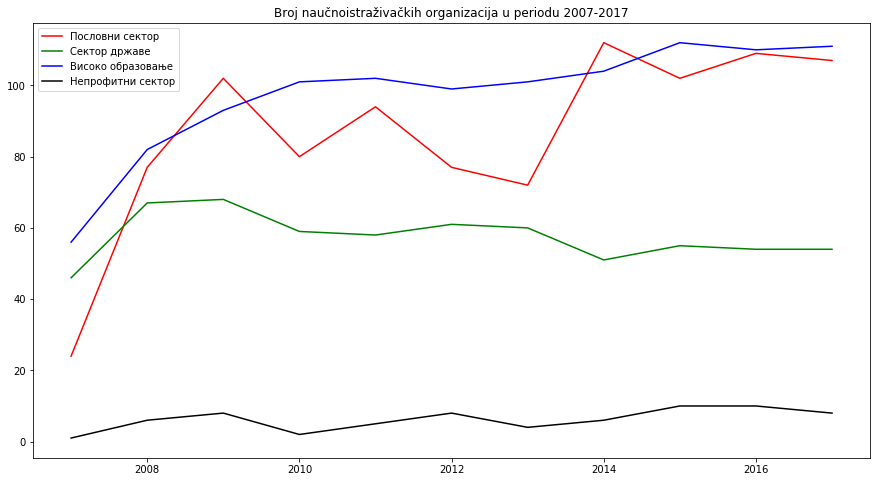

In [65]:
plt.figure(figsize=(15,8))
plt.plot("god", "vrednost",data=brojNIO[(brojNIO["IDTer"]=="RS") & (brojNIO["nSektorNaucOrg"]=="Пословни сектор")], 
         color="r",label="Пословни сектор")
plt.plot("god", "vrednost",data=brojNIO[(brojNIO["IDTer"]=="RS") & (brojNIO["nSektorNaucOrg"]=="Сектор државе")], 
         color="g",label="Сектор државе")
plt.plot("god", "vrednost",data=brojNIO[(brojNIO["IDTer"]=="RS") & (brojNIO["nSektorNaucOrg"]=="Високо образовање")], 
         color="b",label="Високо образовање")
plt.plot("god", "vrednost",data=brojNIO[(brojNIO["IDTer"]=="RS") & (brojNIO["nSektorNaucOrg"]=="Непрофитни сектор")], 
         color="k",label="Непрофитни сектор")
plt.title("Broj naučnoistraživačkih organizacija u periodu 2007-2017")
plt.legend()
plt.show()
plt.close()